# Ensemble of models for object detection

In this notebook, we show how to use the [ensemble for object detection library](https://github.com/ancasag/ensembleObjectDetection) to combine models constructed with different frameworks.

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


## Installation

First of all, we install all the necessary libraries.

### Installation of [MXNet](https://gluon-cv.mxnet.io/)

In [ ]:
!pip install gluoncv
!pip install mxnet

     |████████████████████████████████| 1.1MB 7.9MB/s 
     |████████████████████████████████| 317kB 29.8MB/s 
     |████████████████████████████████| 14.1MB 206kB/s 
     |████████████████████████████████| 317kB 53.2MB/s 
     |████████████████████████████████| 133kB 58.5MB/s 
     |████████████████████████████████| 675kB 50.2MB/s 
     |████████████████████████████████| 215kB 56.6MB/s 
     |████████████████████████████████| 952kB 51.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 7.3MB 48.8MB/s 
     |████████████████████████████████| 71kB 10.2MB/s 
     |████████████████████████████████| 3.2MB 42.8MB/s 
     |████████████████████████████████| 962kB 42.9MB/s 
     |████████████████████████████████| 71kB 9.9MB/s 
  Created wheel for ConfigSpace: filename=ConfigSpace-0.4.18-cp37-cp37m-linux_x86_64.whl size=2879807 sha256=aec5ec7e409b3be1f269c31eed4124b3500678cf5

     |████████████████████████████████| 54.7MB 62kB/s 


### Installation of the [Keras library for RetinaNet](https://github.com/fizyr/keras-retinanet)

In [ ]:
cd ..

/


In [ ]:
!git clone https://github.com/fizyr/keras-retinanet

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6205, done.
remote: Total 6205 (delta 0), reused 0 (delta 0), pack-reused 6205
Receiving objects: 100% (6205/6205), 13.47 MiB | 31.85 MiB/s, done.
Resolving deltas: 100% (4200/4200), done.


In [ ]:
cd keras-retinanet/

/keras-retinanet


In [ ]:
!pip install . --user

Processing /keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=168011 sha256=17c224e0ae69f952b9ed04f090e31734550b68d820c52fc70bba89425cc5162f
  Stored in directory: /root/.cache/pip/wheels/d8/c4/37/e6e27e600dc64bcb9272bd238220c867e3addca32614dcccb0
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=15ba653275093dcc9e416204575342f669a415cd1e920cd8608f33d94ac7001e
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-retinanet keras-resnet
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


We restart the colab environment to have access to the installed libraries.

In [ ]:
import os
os.kill(os.getpid(), 9)

### Installation of the ensemble for object detection library

We clone the code from github in the main folder.

In [ ]:
cd /content

/content


In [ ]:
!git clone https://github.com/ancasag/ensembleObjectDetection.git

Cloning into 'ensembleObjectDetection'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 2068 (delta 95), reused 70 (delta 41), pack-reused 1927
Receiving objects: 100% (2068/2068), 86.46 MiB | 35.12 MiB/s, done.
Resolving deltas: 100% (1301/1301), done.


We access the folder with the cloned code.

In [ ]:
cd ensembleObjectDetection/TestTimeAugmentation

/content/ensembleObjectDetection/TestTimeAugmentation


For our examples, we download a folder with images and the weights that will be employed.

In [ ]:
!wget https://www.dropbox.com/sh/4r4sen849x9gsaa/AAD1R-BxcbJxS_qTha4gmns5a?dl=1 -O Images.zip
!wget https://www.dropbox.com/sh/n21kckhsi200b52/AABxspis34aAZiMUp_cQ6RYFa?dl=1 -O weights.zip

--2021-03-16 17:53:14--  https://www.dropbox.com/sh/4r4sen849x9gsaa/AAD1R-BxcbJxS_qTha4gmns5a?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/dl/4r4sen849x9gsaa/AAD1R-BxcbJxS_qTha4gmns5a [following]
--2021-03-16 17:53:15--  https://www.dropbox.com/sh/dl/4r4sen849x9gsaa/AAD1R-BxcbJxS_qTha4gmns5a
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb294eb787e21a1446ddbadc401.dl.dropboxusercontent.com/zip_download_get/AuM0bEGKufDhlzldo4-w-vr-d0AIK-BKJHmTmnpdIbEGswSmMGSEJyMMjZFIEyE2ELR7hHdftPK_fXoWlhYF831l1jwKYVjOnEexV-Ufw_hL2w?dl=1 [following]
--2021-03-16 17:53:15--  https://ucb294eb787e21a1446ddbadc401.dl.dropboxusercontent.com/zip_download_get/AuM0bEGKufDhlzldo4-w-vr-d0AIK-BKJHmTmnpdIbEGswSmMGSEJyMMjZFIEyE2ELR7hHdftPK_fX

We unzip the downloaded files.

In [ ]:
!unzip Images.zip -d Images/
!unzip weights.zip -d weights/

Archive:  Images.zip
mapname:  conversion of  failed
 extracting: Images/person.jpg       
 extracting: Images/2007_000032.jpg  
 extracting: Images/2007_000039.jpg  
 extracting: Images/2007_000042.jpg  
 extracting: Images/2007_000033.jpg  
 extracting: Images/2007_000027.jpg  
Archive:  weights.zip
mapname:  conversion of  failed
 extracting: weights/coco.csv        
 extracting: weights/coco.names      
 extracting: weights/yolov3.cfg      
 extracting: weights/yolov3.weights  
 extracting: weights/classesMXnet.txt  
 extracting: weights/mask_rcnn_coco.h5  
 extracting: weights/resnet50_coco_best_v2.1.0.h5  
 extracting: weights/yolo3_darknet53_voc-f5ece5ce.params  
 extracting: weights/ssd_512_resnet50_v1_voc-9c8b225a.params  
 extracting: weights/faster_rcnn_resnet50_v1b_voc-447328d8.params  


We install the [CLoDSA library](https://github.com/joheras/CLoDSA) that is required to run our code.

In [ ]:
pip install clodsa

     |████████████████████████████████| 5.7MB 9.6MB/s 
     |████████████████████████████████| 276kB 46.4MB/s 
  Created wheel for clodsa: filename=clodsa-1.2.42-py2.py3-none-any.whl size=72142 sha256=c1f7e5d52e03d9682d63e8b209106194a5eb86e9cd9f13fa03d7e9e4cdd53b6a
  Stored in directory: /root/.cache/pip/wheels/98/7c/f5/4caa95c8cf6a4ed959de7133a5a623ce0c9c4d134e57431204
  Created wheel for commentjson: filename=commentjson-0.9.0-cp37-none-any.whl size=12087 sha256=e23148c56680539df514bac19a5d0ba810967c2b28b19b53c67db9df6c34a9c4
  Stored in directory: /root/.cache/pip/wheels/0d/18/46/8da734185b844fc754de60da2c162fc15f7acdacfd4621144e
  Created wheel for lark-parser: filename=lark_parser-0.7.8-py2.py3-none-any.whl size=62514 sha256=a7bbb0c3c32ad31b2f69814cca7579383089a3fe466a0b8d231d10f1e618bf2b
  Stored in directory: /root/.cache/pip/wheels/01/a2/30/ebae6ffa73cf3aa1c972a24d4c78388afd910f91e43bf554aa
Successfully built clodsa commentjson lark-parser


## Example

For our example, we need to load the following libraries.

In [ ]:
import testTimeAugmentation
import function
import os
import shutil
import argparse
import ensembleOptions
from mainModel import models
from imutils import paths
import warnings
warnings.filterwarnings('ignore')

Now, it is necessary to fix several options.

### Images path

Define the path to the folder containing the images. For this example, we work with the Images folder previously downloaded that contains several images.

In [ ]:
pathImg = 'Images/'

### Select the voting option

You can be taken using three different voting strategies:
*   Affirmative. This means that whenever one of the methods that produce the
initial predictions says that a region contains an object, such a detection is considered as valid.
*   Consensus. This means that the majority of the initial methods must agree to consider that a region contains an object. The consensus strategy is analogous to the majority voting strategy commonly applied in ensemble methods for images classification.
*   Unanimous. This means that all the methods must agree to consider that a region contains an object.


In [ ]:
option = "unanimous"

Define the model you want to use. With the files previously downloaded, you can construct the following models.

- A YOLO model constructed with the [Darknet](https://pjreddie.com/darknet/yolo/) library for the COCO dataset.
- A SSD model constructed with the [MXNet](https://gluon-cv.mxnet.io/) library for the Pascal VOC dataset.
- A Faster RCNN model constructed with the [MXNet](https://gluon-cv.mxnet.io/) for the Pascal VOC dataset.
- A YOLO model constructed with the [MXNet](https://gluon-cv.mxnet.io/) for the Pascal VOC dataset.
- A RetinaNet model constructed with the [Keras library for Retinanet](https://github.com/fizyr/keras-retinanet) for the COCO dataset.



In [ ]:
yoloDarknet = testTimeAugmentation.DarknetYoloPred('weights/yolov3.weights', 'weights/coco.names','weights/yolov3.cfg',0.7)
ssdResnet = testTimeAugmentation.MXnetSSD512Pred('weights/ssd_512_resnet50_v1_voc-9c8b225a.params', 'weights/classesMXnet.txt',0.7)
fasterResnet = testTimeAugmentation.MXnetFasterRCNNPred('weights/Desktop/peso/faster_rcnn_resnet50_v1b_voc-447328d8.params', 'weights/classesMXnet.txt',0.7)
yoloResnet = testTimeAugmentation.MXnetYoloPred('weights/Desktop/peso/yolo3_darknet53_voc-f5ece5ce.params', 'weights/classesMXnet.txt',0.7)
retinaResnet50 = testTimeAugmentation.RetinaNetResnet50Pred('weights/resnet50_coco_best_v2.1.0.h5', 'weights/coco.csv',0.7)

For our examples, we will use the RetinaNet model, the Mask RCNN model and the YOLO model constructed with Darknet.

In [ ]:
listaModels = [retinaResnet50, ssdResnet, yoloDarknet]

In [ ]:
notebook = True

In [ ]:
!rm -r salida/

rm: cannot remove 'salida/': No such file or directory



Finally, we execute the ensemble method with the options we have selected.

In [ ]:
models(listaModels,pathImg,option)

[INFO] predicting on image 1 of 6
[INFO] predicting on image 2 of 6
[INFO] predicting on image 3 of 6
[INFO] predicting on image 4 of 6
[INFO] predicting on image 5 of 6
[INFO] predicting on image 6 of 6


The result can be seen in the output folder that has been generated. Next, we show the process that we have carried out with the the three voting strategies.


In order to see the process on an image, we copy the images to all the generated folders.

In [ ]:
!cp Images/2007_000032.jpg salida/resnet50_coco_best_v2.1.0
!cp Images/2007_000032.jpg salida/yolov3
!cp Images/2007_000032.jpg salida/output

We create the following functions that allow us to show the detections on the image.

In [ ]:
import matplotlib.pyplot as plt
import cv2
import xml.etree.ElementTree as ET

def showImage(imagePath):
  image = cv2.imread(imagePath)
  if len(image.shape)==3:
    img2 = image[:,:,::-1]
    plt.imshow(img2)
    plt.show()
  else:
    img2 = image
    plt.imshow(img2,cmap='gray')
    plt.show()

def combineImageAndPrediction(imagePath,xmlPath):
  image = cv2.imread(imagePath)
  tree = ET.parse(xmlPath)
  root = tree.getroot()
  objects = root.findall('object')
  boxes = []
  for object in objects:
    category = object.find('name').text
    confidence = object.find('confidence')
    box = object.find('bndbox')
    x  = int(box.find('xmin').text)
    y = int(box.find('ymin').text)
    ymax = int(box.find('ymax').text)
    xmax = int(box.find('xmax').text)

    cv2.rectangle(image, (x,y),(xmax,ymax),(0, 255, 0), 2)
    cv2.putText(image, category, (x-2,y-2), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)
  cv2.imwrite('prediction.jpg',image)

### Unanimous

For the RetinaNet model, we obtain the following prediction.

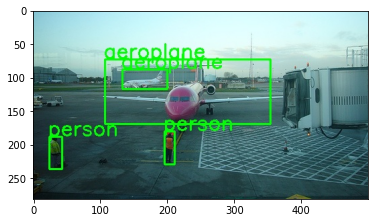

In [ ]:
combineImageAndPrediction('salida/resnet50_coco_best_v2.1.0/2007_000032.jpg','salida/resnet50_coco_best_v2.1.0/2007_000032.xml')
showImage('prediction.jpg')

And with the YOLO model:

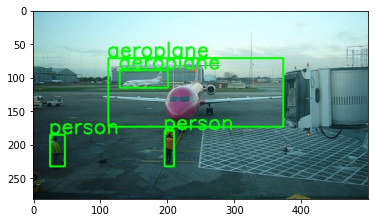

In [ ]:
combineImageAndPrediction('salida/yolov3/2007_000032.jpg','salida/yolov3/2007_000032.xml')
showImage('prediction.jpg')


And finally, when we apply the ensemble method:

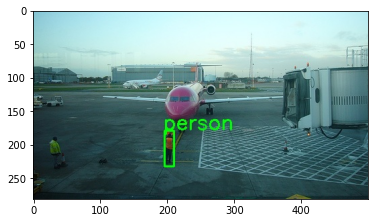

In [ ]:
combineImageAndPrediction('salida/output/2007_000032.jpg','salida/output/2007_000032.xml')
showImage('prediction.jpg')


We copy the unanimous prediction, and delete the output folder and the temporary folder that has been generated in the images to apply the affirmative option.

In [ ]:
!cp salida/output/2007_000032.jpg 2007_000032.jpg
!cp salida/output/2007_000032.xml unanimous.xml
!rm -rf salida
!rm -rf Images/tmp

### Affirmative

We modify the option and execute the function:


In [ ]:
option = "affirmative"
models(listaModels,pathImg,option)

[INFO] predicting on image 1 of 6
[INFO] predicting on image 2 of 6
[INFO] predicting on image 3 of 6



In order to see the process on an image, we copy that image to all folders.

In [ ]:
!cp Images/2007_000032.jpg salida/resnet50_coco_best_v2.1.0
!cp Images/2007_000032.jpg salida/yolov3
!cp Images/2007_000032.jpg salida/output

For the RetinaNet model, we obtain the following prediction.

In [ ]:
combineImageAndPrediction('salida/resnet50_coco_best_v2.1.0/2007_000032.jpg','salida/resnet50_coco_best_v2.1.0/2007_000032.xml')
showImage('prediction.jpg')

For YOLO:

In [ ]:
combineImageAndPrediction('salida/yolov3/2007_000032.jpg','salida/yolov3/2007_000032.xml')
showImage('prediction.jpg')


And finally the result of applying the ensemble algorithm:

In [ ]:
combineImageAndPrediction('salida/output/2007_000032.jpg','salida/output/2007_000032.xml')
showImage('prediction.jpg')

We delete the output folder and the temporary folder that has been generated in the images to apply the consensus option.

In [ ]:
!cp salida/output/2007_000032.xml affirmative.xml
!rm -rf salida
!rm -rf Images/tmp

### Consensus

We modify the option and execute the function:

In [ ]:
option = "consensus"
models(listaModels,pathImg,option)


In order to see the process on an image, we copy that image to all folders.

In [ ]:
!cp Images/2007_000032.jpg salida/resnet50_coco_best_v2.1.0
!cp Images/2007_000032.jpg salida/yolov3
!cp Images/2007_000032.jpg salida/output


For the RetinaNet model, we obtain the following prediction.

In [ ]:
combineImageAndPrediction('salida/resnet50_coco_best_v2.1.0/2007_000032.jpg','salida/resnet50_coco_best_v2.1.0/2007_000032.xml')
showImage('prediction.jpg')

With YOLO:

In [ ]:
combineImageAndPrediction('salida/yolov3/2007_000032.jpg','salida/yolov3/2007_000032.xml')
showImage('prediction.jpg')


And finally the result of applying the ensemble method:

In [ ]:
combineImageAndPrediction('salida/output/2007_000032.jpg','salida/output/2007_000032.xml')
showImage('prediction.jpg')

In [ ]:
!cp salida/output/2007_000032.xml consensus.xml

Now, we can see the difference between the three methods.

In [ ]:
print('Affirmative')
combineImageAndPrediction('salida/output/2007_000032.jpg','affirmative.xml')
showImage('prediction.jpg')
print('Consensus')
combineImageAndPrediction('salida/output/2007_000032.jpg','consensus.xml')
showImage('prediction.jpg')
print('Unanimous')
combineImageAndPrediction('salida/output/2007_000032.jpg','unanimous.xml')
showImage('prediction.jpg')